# Fibonacci Numbers

$F_0 = 0$

$F_1 = 1$

$F_i = F_{i−1} + F_{i−2}$



Code (By Recursion)
```
Fibonacci(𝑛):
    if 𝑛 ≤ 1:
        return 𝑛
    return Fibonacci(𝑛 − 1) + Fibonacci(𝑛 − 2)
```

In [1]:
def fib(n):
    if n<2:
        return n
    else:
        return fib(n-1)+fib(n-2)
    

for i in range(8):
    print("%s: %s" % (i, fib(i)))

0: 0
1: 1
2: 1
3: 2
4: 3
5: 5
6: 8
7: 13


# Memoized

Store result somewhere first

In [2]:
def fib_m(n, _cache = {}):
    if n<2:
        return n
    elif n in _cache:
        return _cache[n]
    else:
        _cache[n] = fib_m(n-1)+fib_m(n-2) 
        return _cache[n]
    
for i in range(8):
    print("%s: %s" % (i, fib_m(i)))

0: 0
1: 1
2: 1
3: 2
4: 3
5: 5
6: 8
7: 13


# Generate Fibonacci Sequence

```
Create an array F[0 . . . n]
```
Initialize <br>
$F_0 = 0$ <br>
$F_1 = 1$

```
for i from 2 to n:
    F[i] = F[i-1] + F[i-2]
    
return F
```

In [3]:
# my own
def generate_fib(n):
    seq = {0:0, 1:1}
    for i in range(2,n+1): # from 2 to n
        seq[i] = seq[i-1] + seq[i-2]
        
    return seq

generate_fib(10)

{0: 0, 1: 1, 2: 1, 3: 2, 4: 3, 5: 5, 6: 8, 7: 13, 8: 21, 9: 34, 10: 55}

In [4]:
%timeit fib(20)

1.94 ms ± 45.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [5]:
%timeit fib_m(20)

145 ns ± 5.93 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [6]:
%timeit generate_fib(20)[20]

2.9 µs ± 43.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Last Digit of a Large Fibonacci Number

Your goal in this problem is to find the last digit of 𝑛-th Fibonacci number. Recall that Fibonacci numbers
grow exponentially fast. For example,

$F_{200} = 280 571 172 992 510 140 037 611 932 413 038 677 189 525$

In [7]:
# my solution
n = 327305
f = generate_fib(n)
f[n]%10

5

# Pisano period.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
fiblist = generate_fib(30)

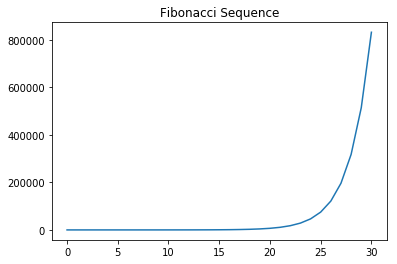

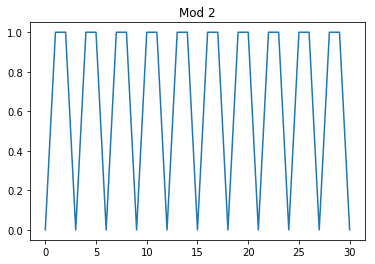

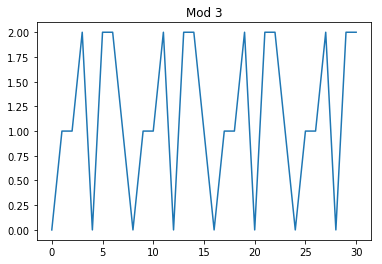

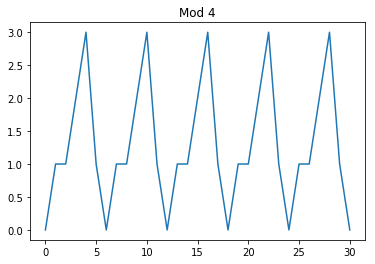

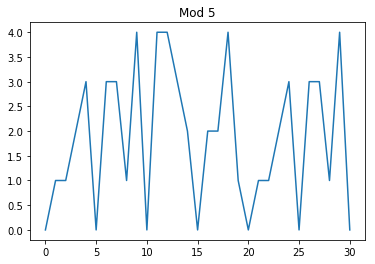

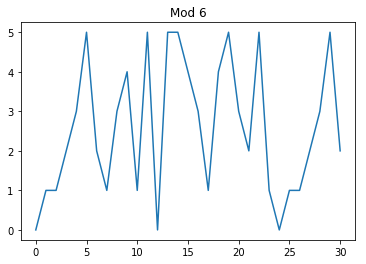

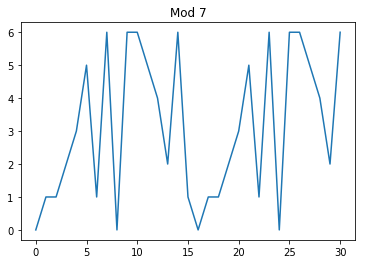

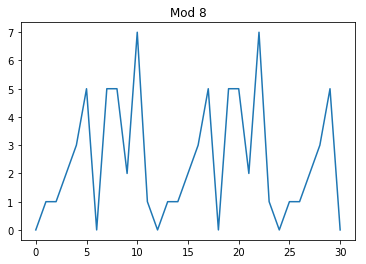

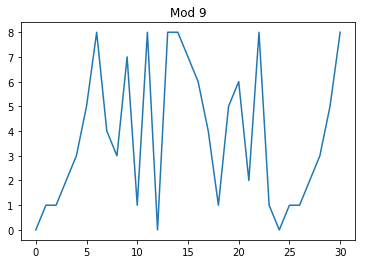

In [30]:
for i in range(1, 10):
    if i==1:
        plt.title("Fibonacci Sequence")
        plt.plot(fiblist.keys(), [fiblist[keys] for keys in fiblist])
    else:
        plt.title("Mod %s" % i)
        p = [fiblist[keys]%i for keys in fiblist]
        plt.plot(fiblist.keys(), p)    
    plt.show()

In [31]:
import pandas as pd
pd.options.display.max_columns = None

In [34]:
ls = []

for i in range(1, 11):
    if i==1:
        ls.append([fiblist[keys] for keys in fiblist])
    else:
        ls.append([fiblist[keys]%i for keys in fiblist])

In [35]:
df = pd.DataFrame(ls, columns=fiblist.keys(), index = ["mod %s" % (i+1) if i!=0 else "Fibonacci" for i in range(len(ls))])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
Fibonacci,0,1,1,2,3,5,8,13,21,34,55,89,144,233,377,610,987,1597,2584,4181,6765,10946,17711,28657,46368,75025,121393,196418,317811,514229,832040
mod 2,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0
mod 3,0,1,1,2,0,2,2,1,0,1,1,2,0,2,2,1,0,1,1,2,0,2,2,1,0,1,1,2,0,2,2
mod 4,0,1,1,2,3,1,0,1,1,2,3,1,0,1,1,2,3,1,0,1,1,2,3,1,0,1,1,2,3,1,0
mod 5,0,1,1,2,3,0,3,3,1,4,0,4,4,3,2,0,2,2,4,1,0,1,1,2,3,0,3,3,1,4,0
mod 6,0,1,1,2,3,5,2,1,3,4,1,5,0,5,5,4,3,1,4,5,3,2,5,1,0,1,1,2,3,5,2
mod 7,0,1,1,2,3,5,1,6,0,6,6,5,4,2,6,1,0,1,1,2,3,5,1,6,0,6,6,5,4,2,6
mod 8,0,1,1,2,3,5,0,5,5,2,7,1,0,1,1,2,3,5,0,5,5,2,7,1,0,1,1,2,3,5,0
mod 9,0,1,1,2,3,5,8,4,3,7,1,8,0,8,8,7,6,4,1,5,6,2,8,1,0,1,1,2,3,5,8
mod 10,0,1,1,2,3,5,8,3,1,4,5,9,4,3,7,0,7,7,4,1,5,6,1,7,8,5,3,8,1,9,0
